In [1]:
from imaster_paper_args import *

Start_client: No scheduler file, will start local cluster at  ./temp_skylens/pid5512/


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8811 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45497 instead
  warnings.warn(


In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [3]:
def chi2(data=[],model=[],cov=[]):
    print('chi2',len(data))
    loss=data-model
    cov_inv=np.linalg.inv(cov)
    chi=loss@cov_inv@loss
    return chi

In [4]:
outp={}
cl_sim_W={}
zs_bin={}
zl_bin={}
cl0={}
cl0_win0={}
# l_bins={}
use_shot_noise={}
skylens_kwargs={}

In [5]:
labels={}
labels[corr_gg]=r'$gg$'
labels[corr_ll]=r'$\gamma\gamma$'
labels[corr_ggl]=r'$g \gamma$'

corr_labels={}
corr_labels[corr_ll]=r'$\gamma\gamma^{EE}$'
corr_labels['shear_B']=r'$\gamma\gamma^{BB}$'
corr_labels[corr_gg]=r'$gg$'
corr_labels[corr_ggl]=r'$g\gamma$'

master_labels={}
master_labels['Master']=r'Master'
master_labels['iMaster']=r'$i$Master'
master_labels['nMaster']=r'cMaster'


corr_fnames={}
corr_fnames[corr_ll]='ll'
corr_fnames[corr_gg]='gg'
corr_fnames[corr_ggl]='ggl'

In [6]:
file_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/'
# fnames={0:file_home+'xi0_cl0_sims_newN10_ns512_lmax512_wlmax1025_fsky0.3_noSN_deltaW.pkl'}
# fnames[1]=file_home+'cl0_sims_newN100_ns1024_lmax1000_wlmax2001_fsky0.3_noSN_cWin_delta.pkl'
# fnames={0:file_home+'cl0_sims_newN1000_ns1024_lmax1000_wlmax2001_fsky0.3_deltaW.pkl'}
# fnames[1]=file_home+'cl0_sims_newN1000_ns1024_lmax1000_wlmax2001_fsky0.3_cWin_deltaW.pkl'

fnames={0:file_home+'cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky0.3_noSN_deltaW.pkl'}
fnames[1]=file_home+'cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky0.3_noSN_cWin_deltaW.pkl'

for i in fnames.keys():
    with open(fnames[i],'rb') as f:
        outp[i]=pickle.load(f)

    cl_sim_W[i]=outp[i]['simW']
    zs_bin[i]=outp[i]['shear_zbins']
    zl_bin[i]=outp[i]['galaxy_zbins']
    cl0[i]=outp[i]['cl0']
    cl0_win0[i]=outp[i]['cl0_win']
#     l_bins[i]=cl_sim_W[i]['l_bins']
    use_shot_noise[i]=cl_sim_W[i]['use_shot_noise']
    skylens_kwargs[i]=outp[i]['Skylens_kwargs']

In [7]:
nsim=1000

[]

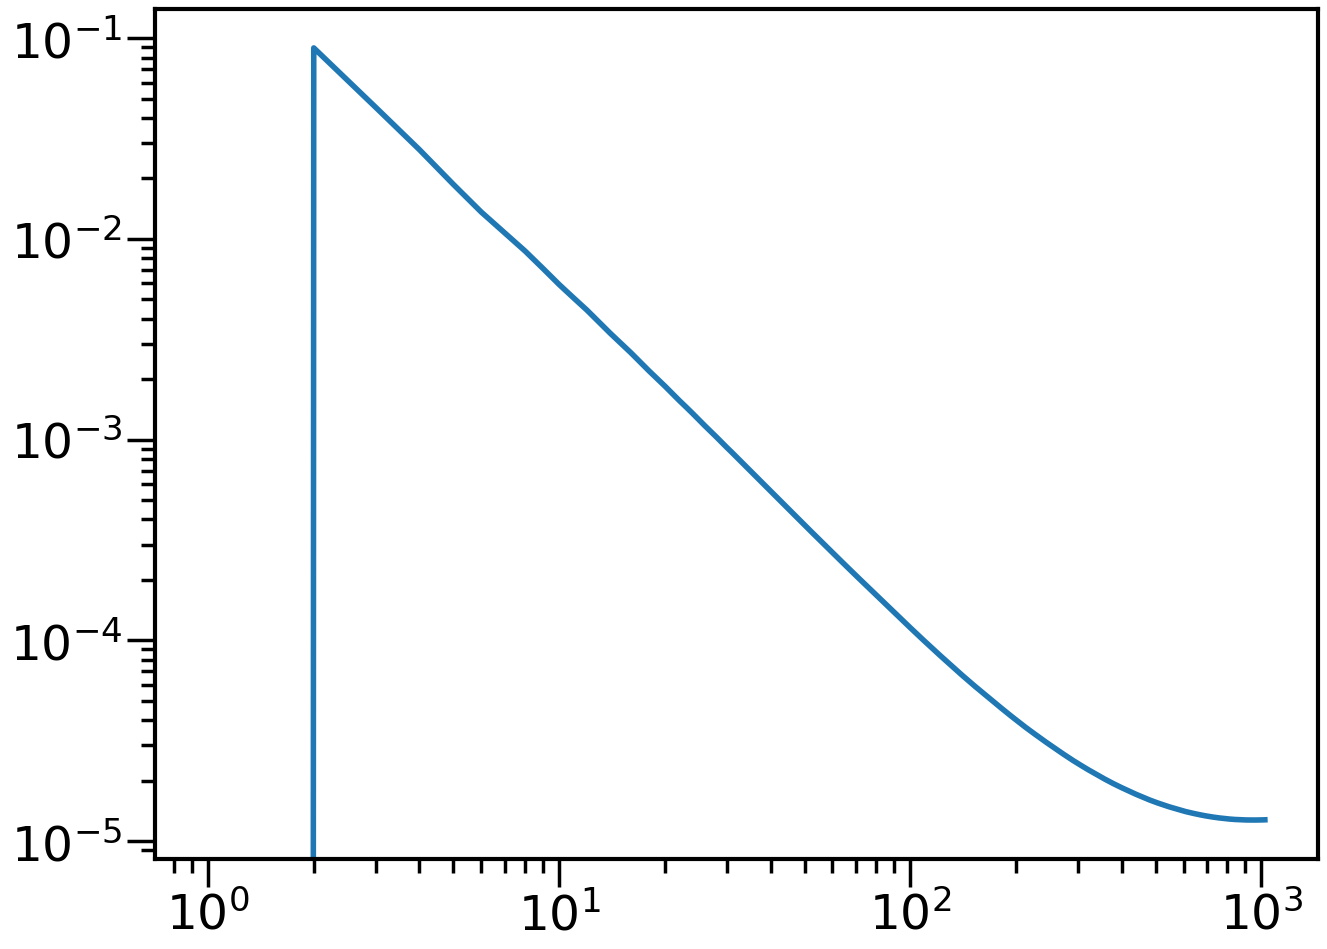

In [8]:
cl_simi=cl_sim_W[0]
# plot(np.diag(cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']))
plot(np.diag(cl_simi['coupling_M']['full']['coupling_M']['shear_B']))
loglog()

[]

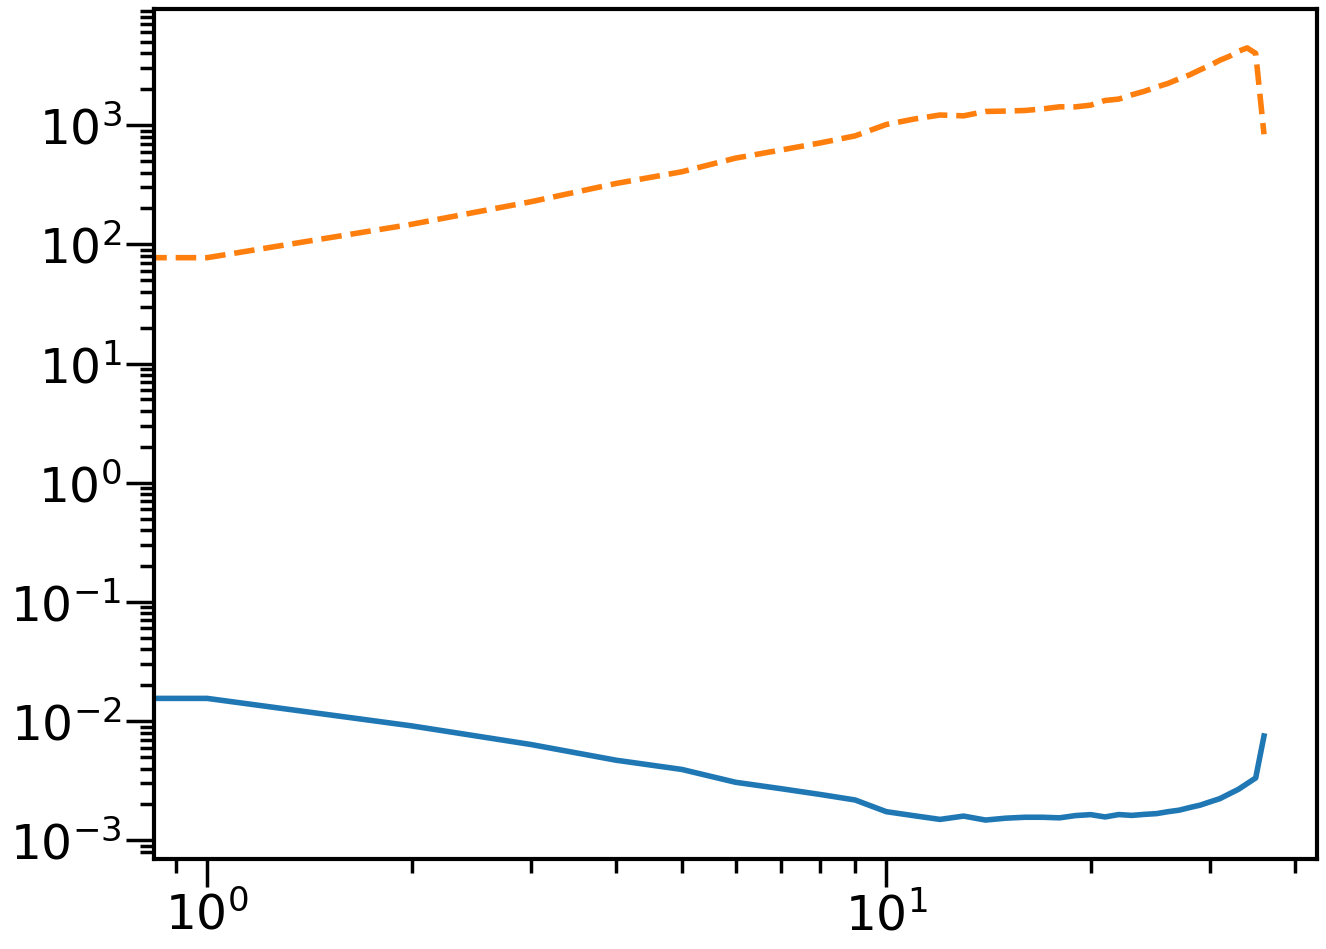

In [9]:
# mt=cl_simi['coupling_M']['full']['coupling_M'][corr_ll]@cl_simi['coupling_M']['full']['coupling_M']['shear_B']
# mt=np.linalg.pinv(cl_simi['coupling_M']['full']['coupling_M'][corr_ll])@cl_simi['coupling_M']['full']['coupling_M']['shear_B']
mt=np.linalg.pinv(cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster'][corr_ll])@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
mt2=np.linalg.pinv(cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B'])@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster'][corr_ll]
plot(np.diag(mt))
plot(np.diag(mt2),ls='--')
loglog()

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_noSN_deltaW.pdf


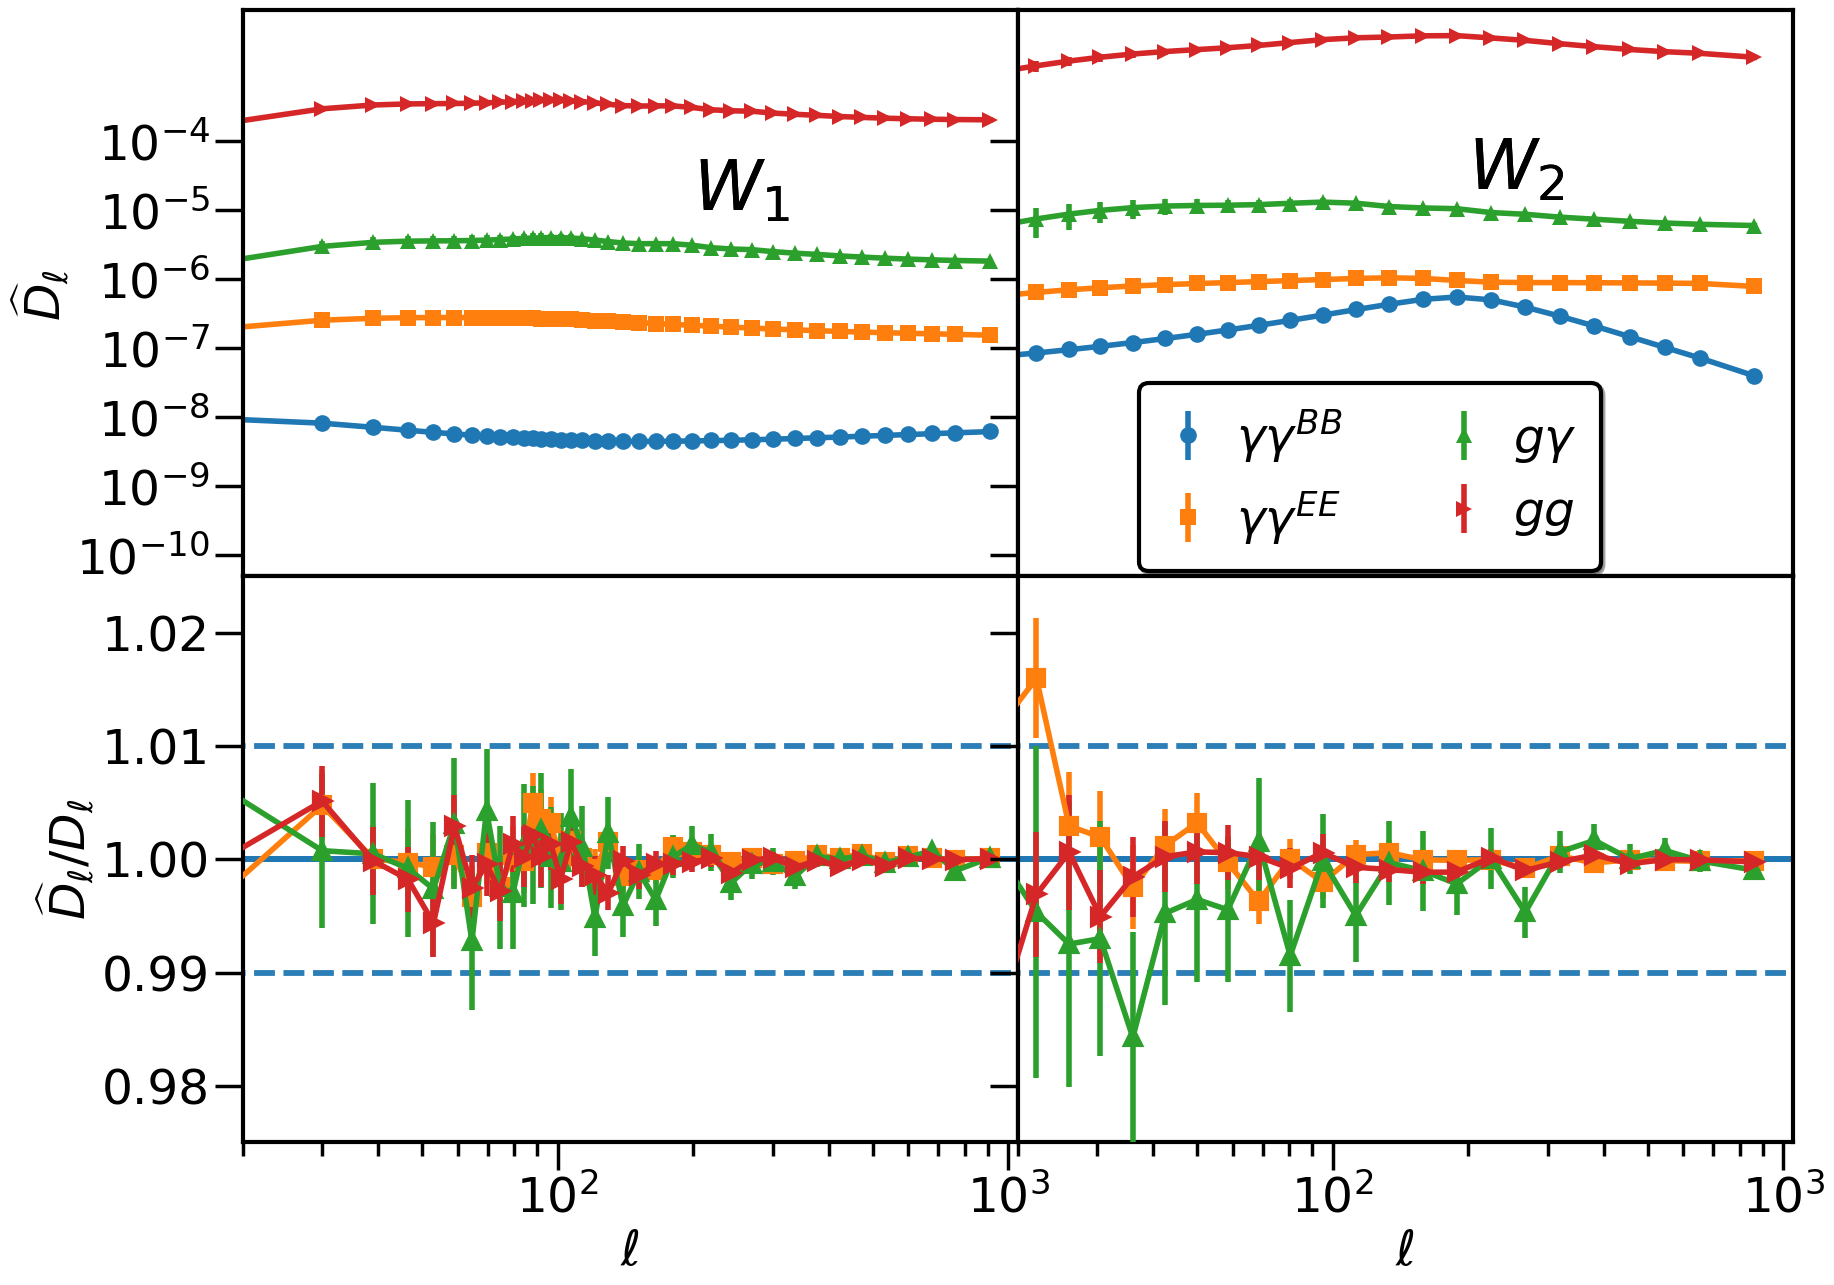

In [11]:
f=1
corr_i=0
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
#         else:
#             cl_simi=cl_sim_Ww
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        pS=ax[0,simj]
        pR=ax[1,simj]
        
#         nsim=cl_simi['nsim']
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        if corr==corr_ll and corr_i==0:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels['shear_B'])
#             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
            clt=cl_simi['cl0_b'][corr]
#             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
            pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
    
            pS.plot(lb,f*pcli,c=color)
            f=0#1./pcli
        else:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels[corr])
            pS.plot(lb,f*cl_simi['pcl0'][corr],c=color)
            f=1./cl_simi['pcl0'][corr]
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)

        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.975,1.025)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
        pS.set_ylim(5.e-11,8.e-3)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
ax[0,0].set_yticks(np.logspace(-10,-4,7))

fname=fnames[0].split('.pkl')[0]
fname=fname.split('tests')[1]
fname=fname.split('.')
fname=fname[0]+fname[1]
fname=fig_home+fname
fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)    
show()

('shear', 'shear') 0
('shear', 'shear') 1
chi2 37
chi2: 0 ('shear', 'shear') Master 35.15030416972792
chi2 25
chi2: 1 ('shear', 'shear') Master 1202.49759605337
('galaxy', 'shear') 2
chi2 37
chi2: 0 ('galaxy', 'shear') Master 0.6021016390936227
chi2 25
chi2: 1 ('galaxy', 'shear') Master 0.15767053605177983
('galaxy', 'galaxy') 3
chi2 37
chi2: 0 ('galaxy', 'galaxy') Master 457.25865286253713
chi2 25
chi2: 1 ('galaxy', 'galaxy') Master 2432.8395849862773


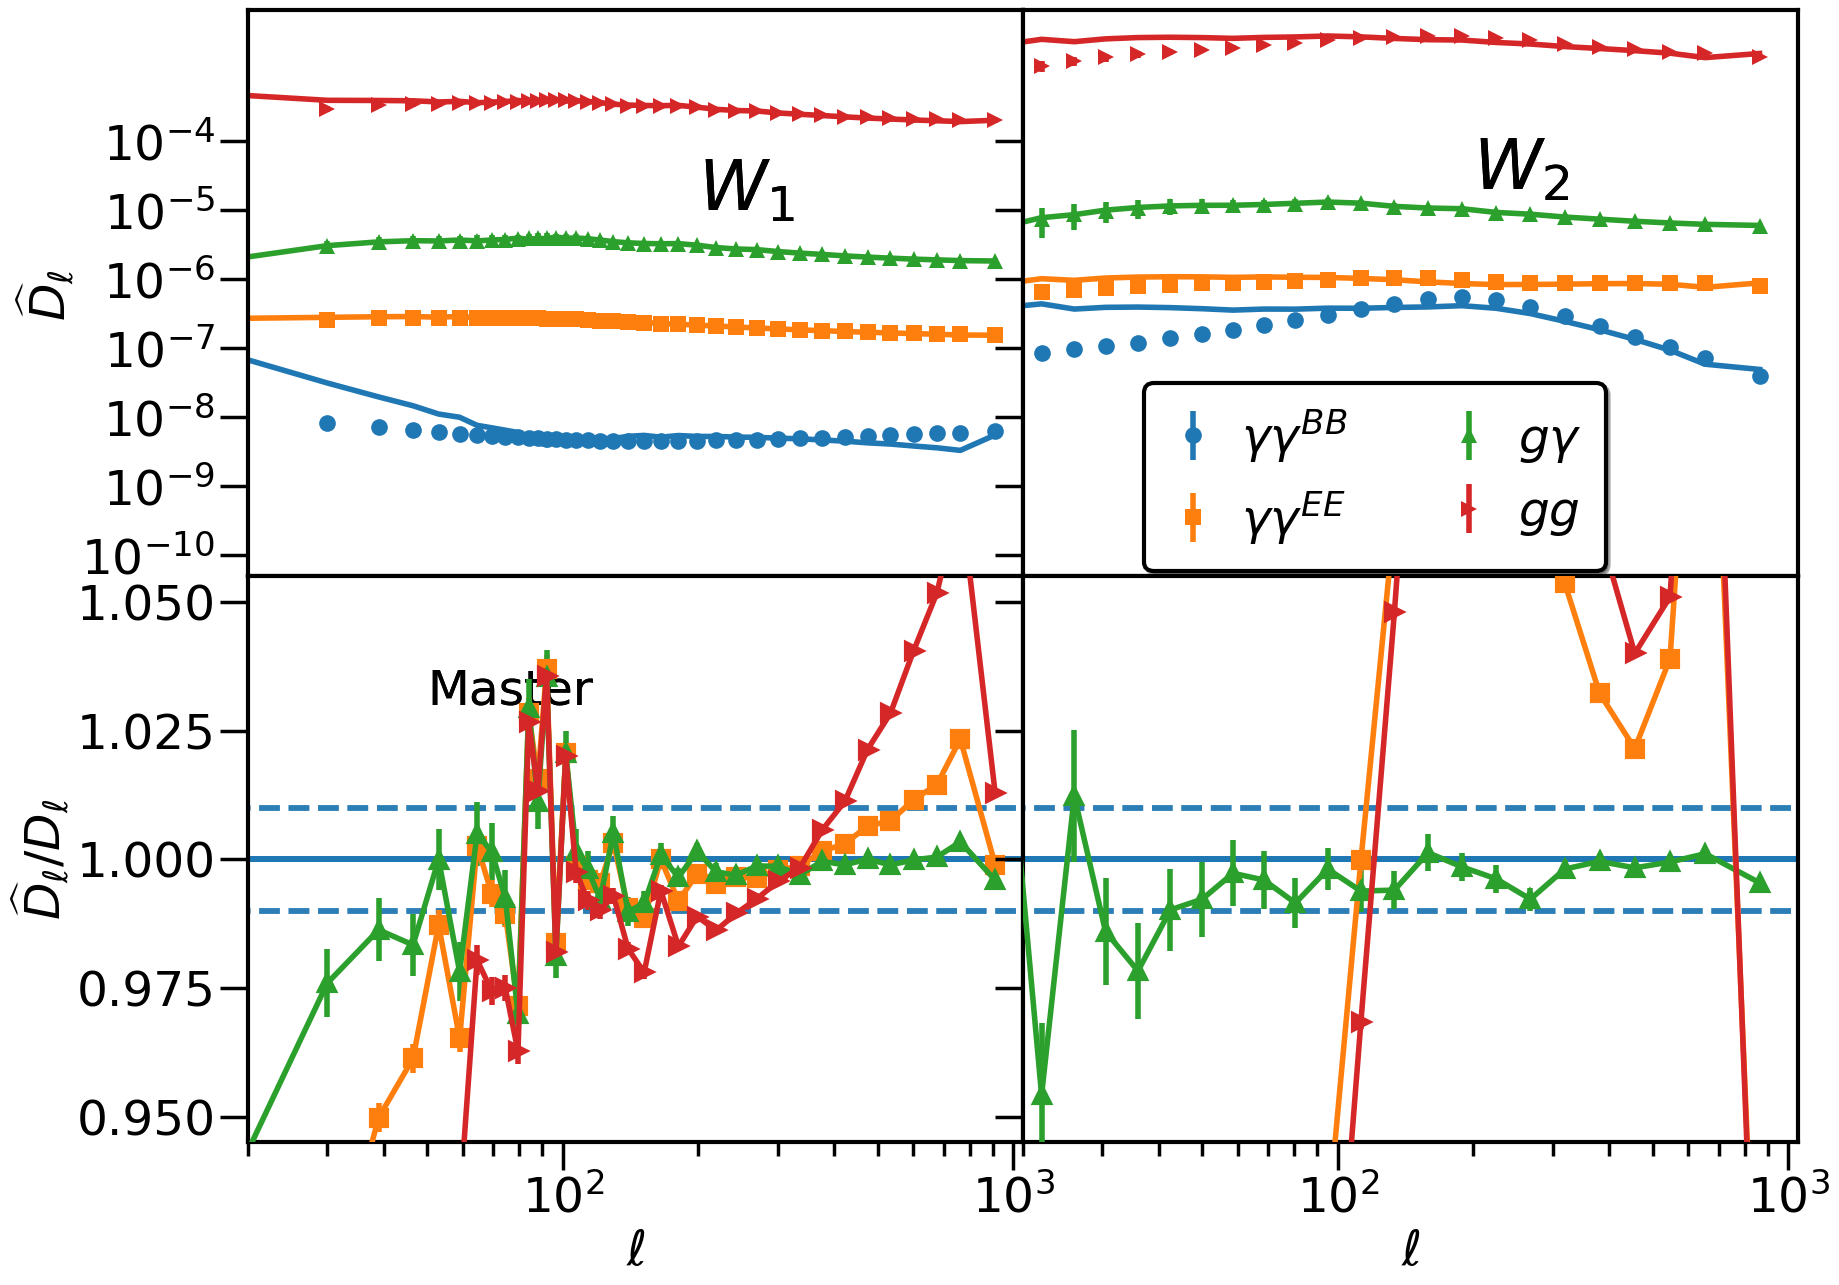

('shear', 'shear') 0
('shear', 'shear') 1
chi2 37
chi2: 0 ('shear', 'shear') iMaster 0.8081063528956411
chi2 25
chi2: 1 ('shear', 'shear') iMaster 2.952570546891017
('galaxy', 'shear') 2
chi2 37
chi2: 0 ('galaxy', 'shear') iMaster 0.15843041265937613
chi2 25
chi2: 1 ('galaxy', 'shear') iMaster 0.025935105445967964
('galaxy', 'galaxy') 3
chi2 37
chi2: 0 ('galaxy', 'galaxy') iMaster 1.0919409471900992
chi2 25
chi2: 1 ('galaxy', 'galaxy') iMaster 2.8371764165652436


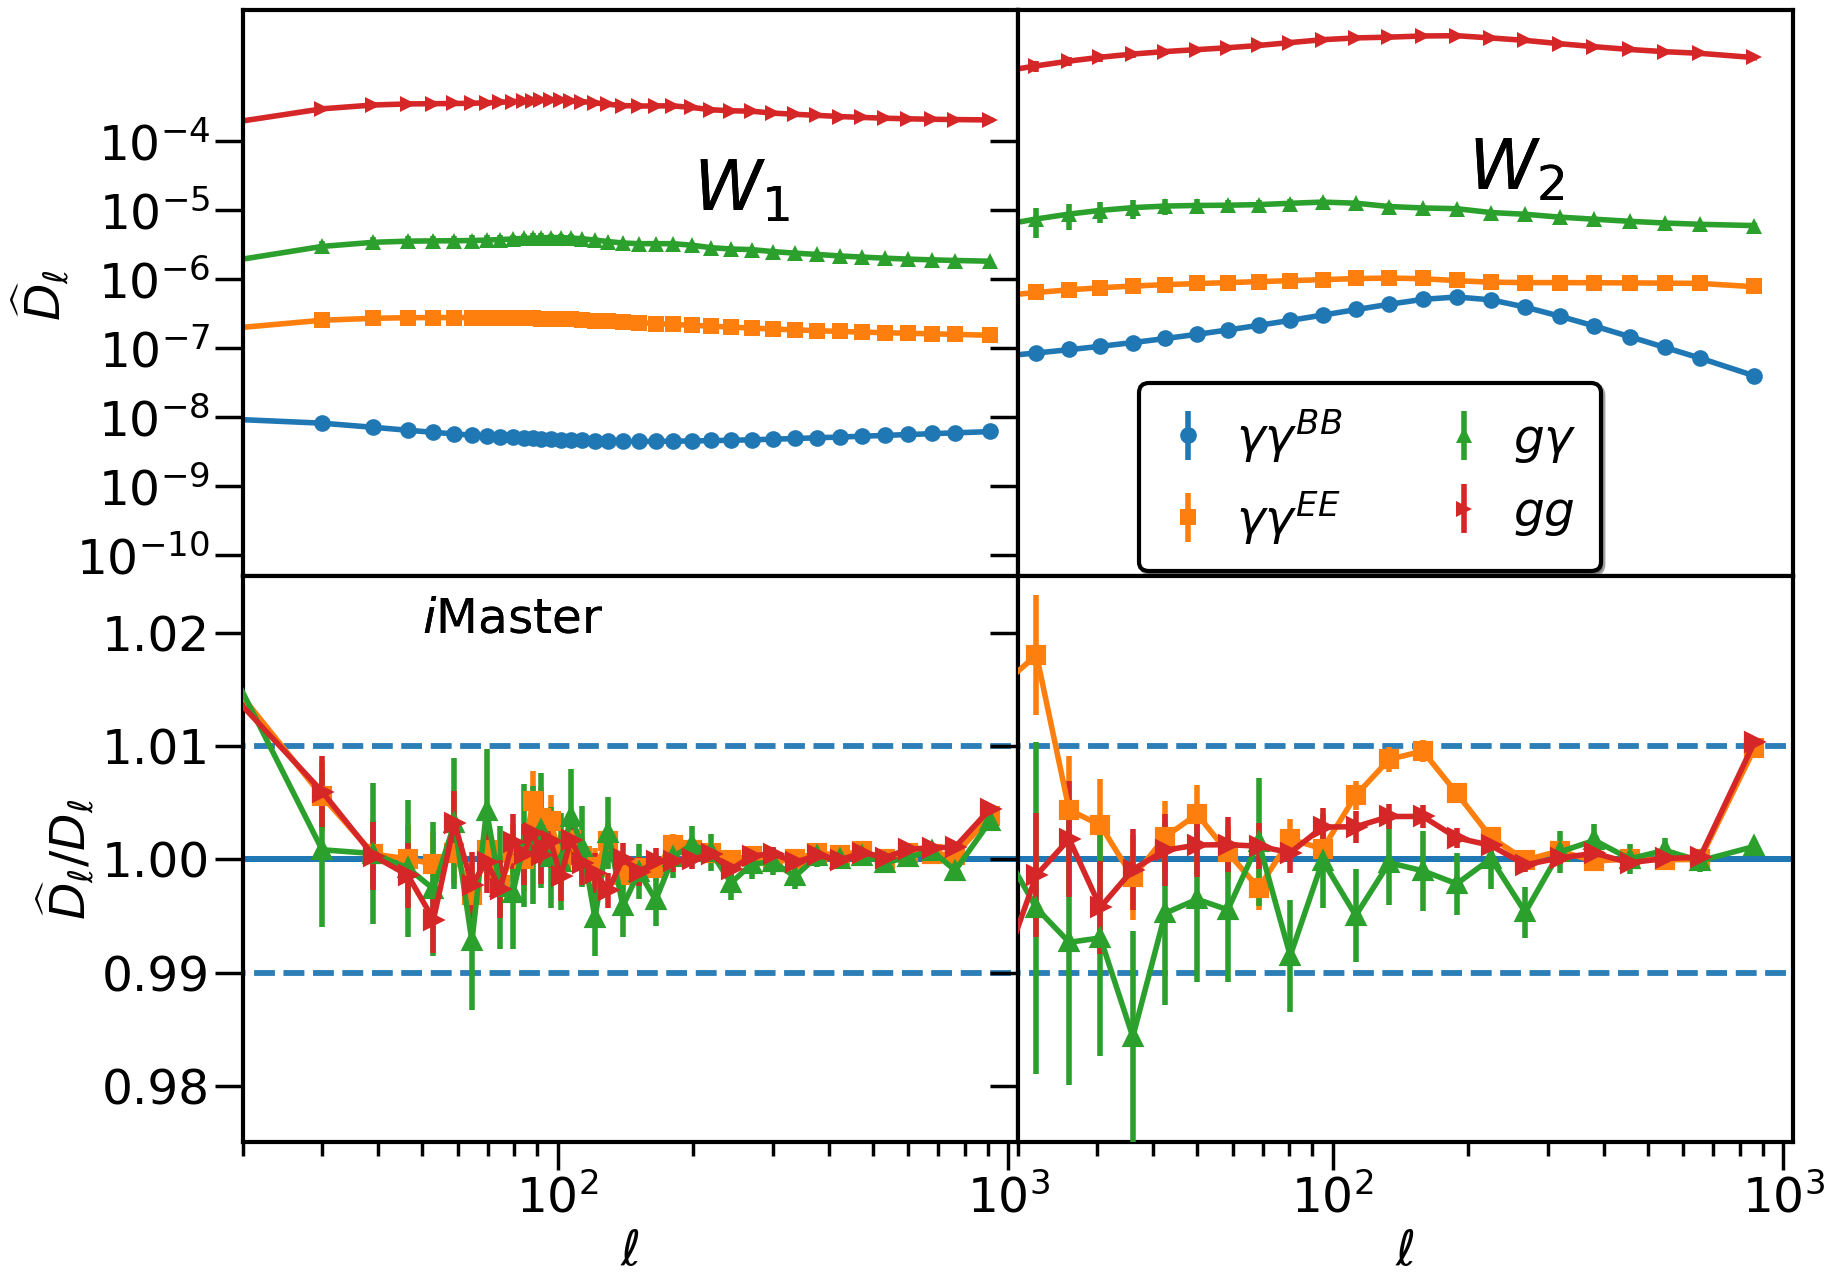

('shear', 'shear') 0
('shear', 'shear') 1
chi2 37
chi2: 0 ('shear', 'shear') nMaster 6747.277968653808
chi2 25
chi2: 1 ('shear', 'shear') nMaster 5390.046317113632
('galaxy', 'shear') 2
chi2 37
chi2: 0 ('galaxy', 'shear') nMaster 1.2808628810594194
chi2 25
chi2: 1 ('galaxy', 'shear') nMaster 0.9474102291521186
('galaxy', 'galaxy') 3
chi2 37
chi2: 0 ('galaxy', 'galaxy') nMaster 83099.25152428827
chi2 25
chi2: 1 ('galaxy', 'galaxy') nMaster 6753.378777984724


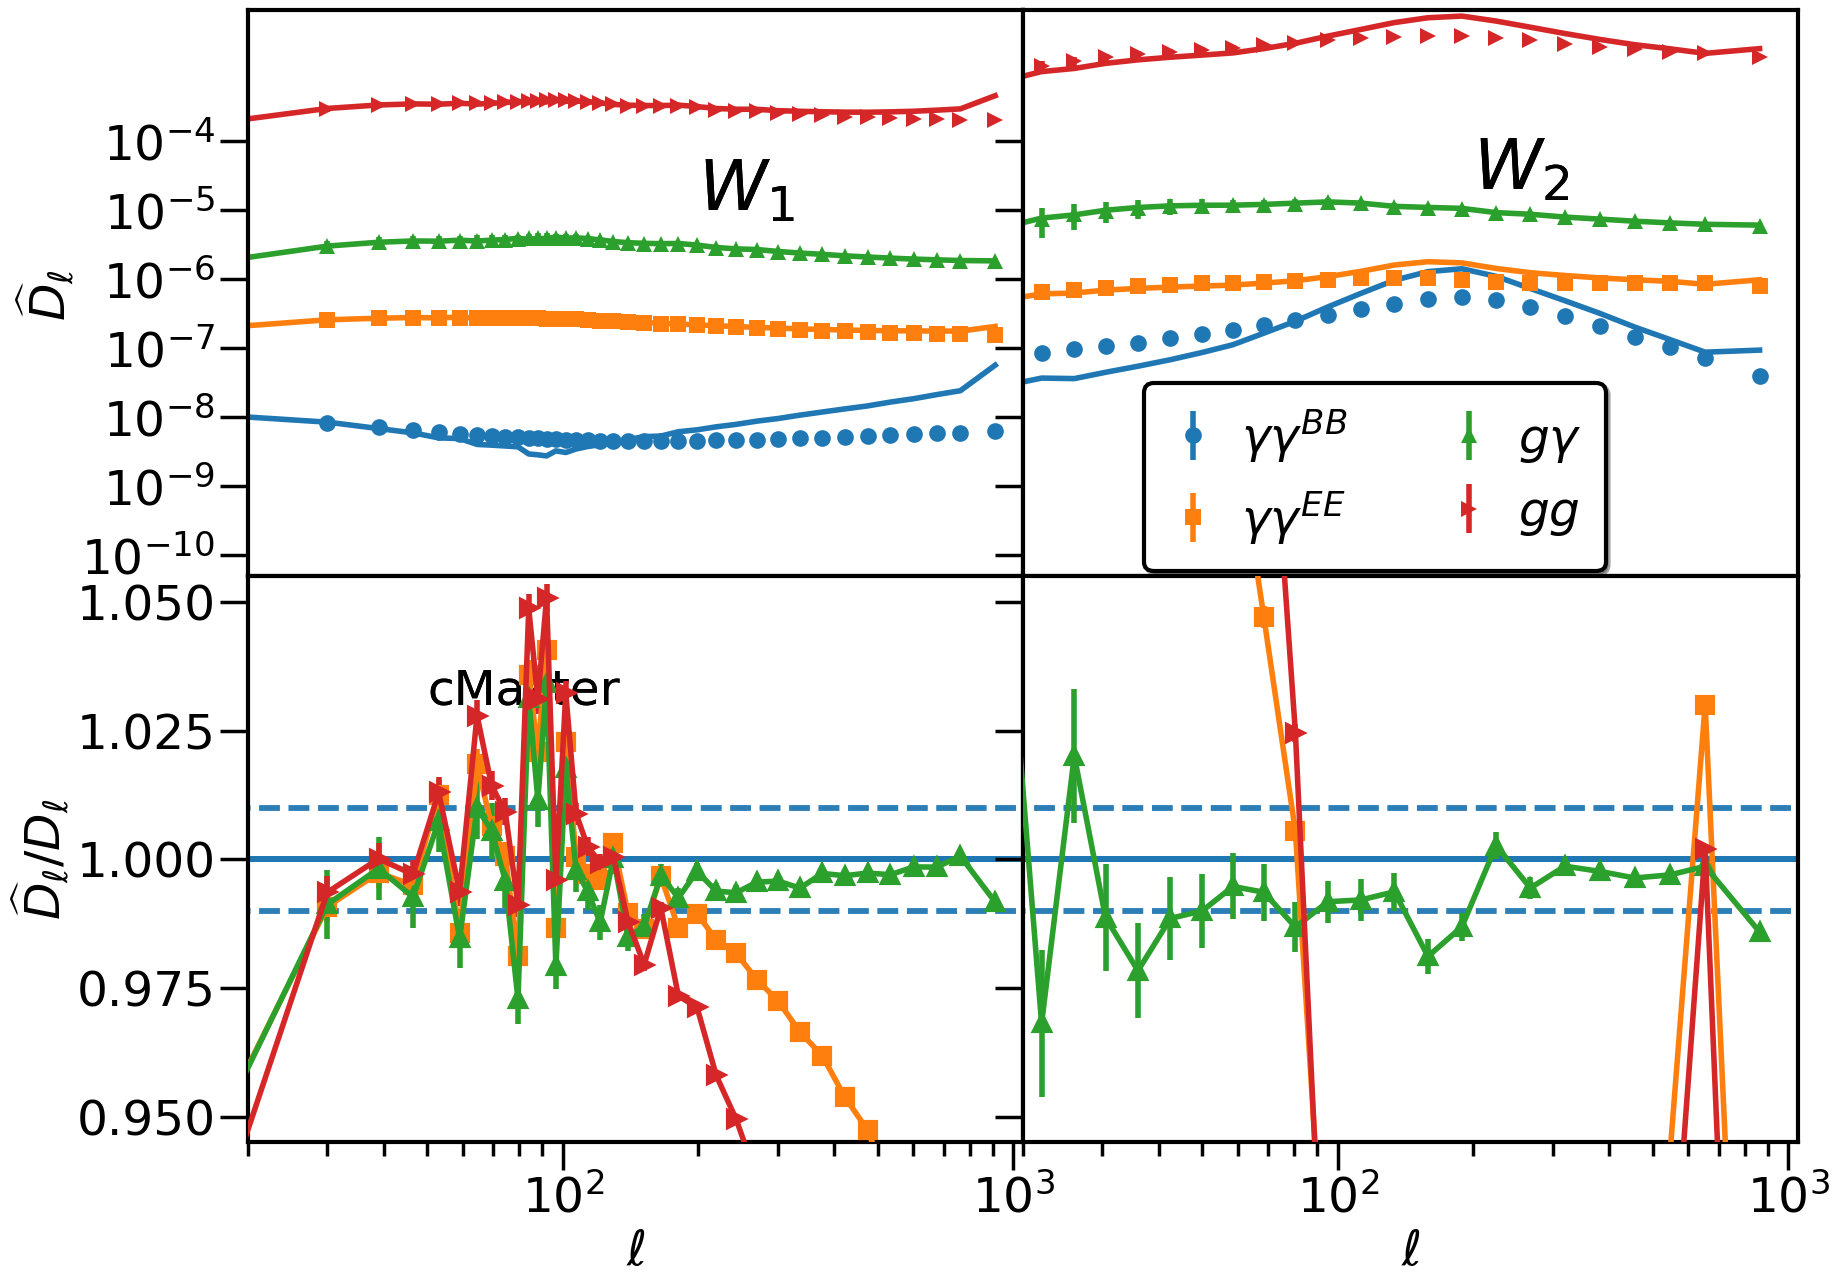

In [12]:
f=1
k='Master'
for k in ['Master','iMaster','nMaster']:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    corr_i=0
    for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
        color=colors[corr_i]
        marker=markers[corr_i]
        print(corr,corr_i)
        for simj in fnames.keys():#np.arange(1):
            cl_simi=cl_sim_W[simj]
    #         else:
    #             cl_simi=cl_sim_Ww
            l_bins=cl_simi['l_bins']
            l=cl_simi['l']
            lb=0.5*(l_bins[1:]+l_bins[:-1])
            pS=ax[0,simj]
            pR=ax[1,simj]

    #         nsim=cl_simi['nsim']
            f=lb
            f2=f/sqrt(nsim)
            i=0
            nlb=len(lb)
            if corr==corr_ll and corr_i==0:
                pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                        fmt=marker,c=color,label=corr_labels['shear_B'])
    #             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
                clt=cl_simi['cl0_b'][corr]
    #             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k]['shear_B']
                pS.plot(lb,f*pcli,c=color)
                f=0#1./pcli
            else:
                pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                        fmt=marker,c=color,label=corr_labels[corr])
                clt=cl_simi['cl0_b'][corr]
    #             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k][corr]
                pS.plot(lb,f*pcli,c=color)
            
                d_i=cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i]
                cov_i=cl_simi['pcl_b_stats']['cov'][corr_i*nlb:corr_i*nlb+nlb,corr_i*nlb:corr_i*nlb+nlb]*1.
#                 chi_i=chi2(data=d_i,model=pcli,cov=cov_i)
                idx_min=5
                chi_i=chi2(data=d_i[idx_min:-1], model=cl0i[idx_min:-1],cov=cov_i[idx_min:-1,idx_min:-1])
                print('chi2:',simj,corr,k,chi_i)
                f=1./pcli
            f2=f/sqrt(nsim)
            pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
                        f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)

            pR.set_xscale('log')
            # yscale('log')
            pR.set_ylim(.945,1.055)
            if k=='iMaster':
                pR.set_ylim(.975,1.025)
            pR.hlines(1,10,3000)
            pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
            pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)

            pS.set_yscale('log')
            pS.set_ylim(5.e-11,8.e-3)
    #         tf=.9
    #         if corr==corr_ll:
    #             pS.set_ylim(3.e-7,1.e-6)
    #             pR.set_ylim(.9,1.11)
    #             tf=1
            pR.set_xlim(20,1050)
            pR.set_xlabel(r'$\ell$')
            if simj==0:
                pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
                pS.set_ylabel(r'$\widehat D_\ell$ ')
            if corr==corr_ll:
                if simj==0:
                    pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
                    yt=1.03
                    if k=='iMaster':
                        yt=1.02
                    pR.text(x=50,y=yt,s=master_labels[k],fontsize=35)
                if simj==1:
                    pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        corr_i+=1
    ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
    ax[0,0].set_yticks(np.logspace(-10,-4,7))

    fname=fnames[0].split('.pkl')[0]
    fname=fname.split('tests')[1]
    fname=fname.split('.')
    fname=fname[0]+fname[1]
    fname+='_pcl_'+k
    fname=fig_home+fname
    fname+='.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
#     print('saved to ',fname)    
    show()

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3


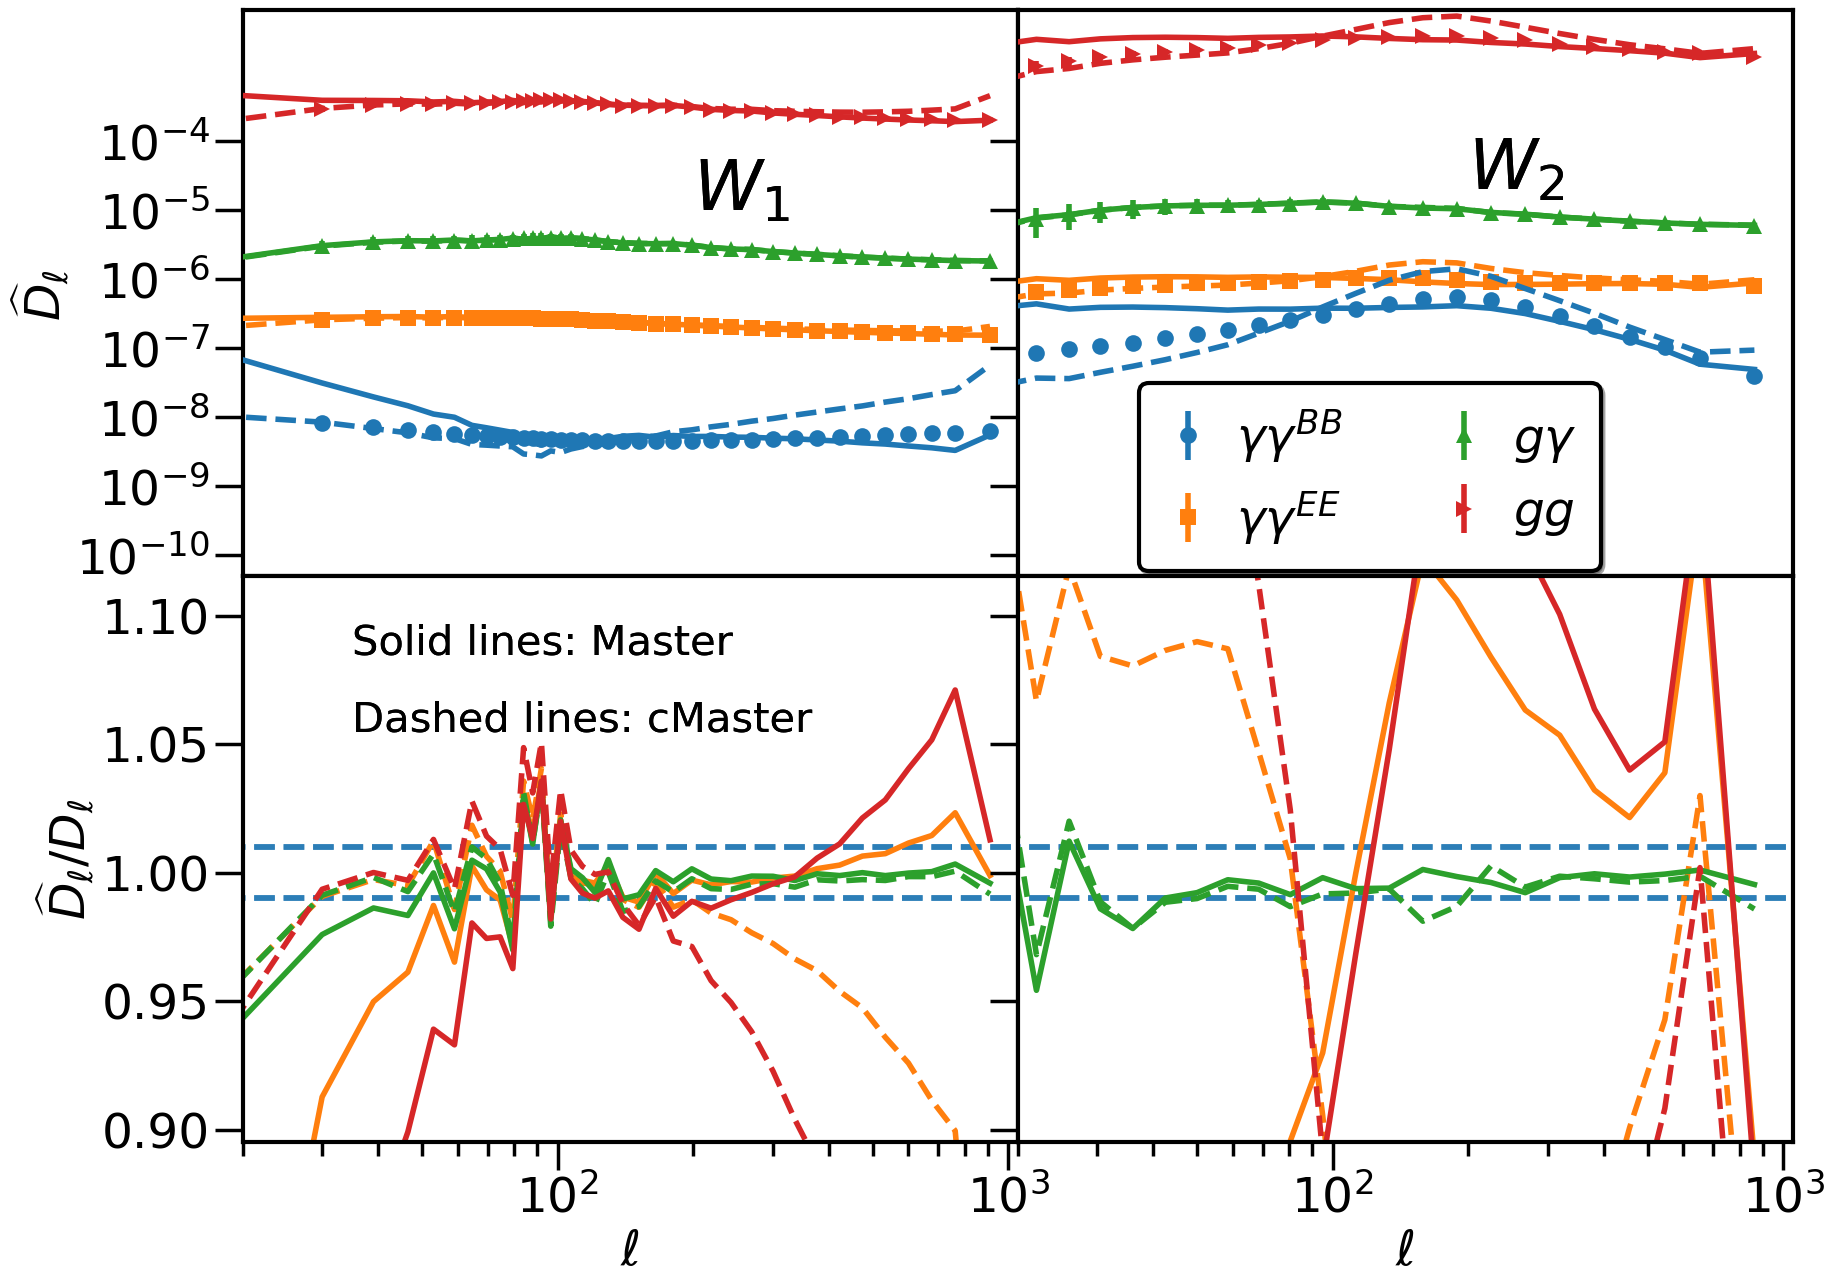

In [13]:
f=1
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
corr_i=0
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
#         else:
#             cl_simi=cl_sim_Ww
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        pS=ax[0,simj]
        pR=ax[1,simj]

#         nsim=cl_simi['nsim']
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        k_ls=['-','--']#,'-']
        if corr==corr_ll and corr_i==0:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels['shear_B'])
#             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
            clt=cl_simi['cl0_b'][corr]
#             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
            
            ik=0
            for k in ['Master','nMaster']:#,'iMaster']:
                f=lb
                f2=f/sqrt(nsim)
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k]['shear_B']
                pS.plot(lb,f*pcli,c=color,ls=k_ls[ik],zorder=10+ik)
                ik+=1
                f=0#1./pcli
        else:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels[corr])
            clt=cl_simi['cl0_b'][corr]
            ik=0
            for k in ['Master','nMaster']:#,'iMaster']:
                f=lb
                f2=f/sqrt(nsim)
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k][corr]
                pS.plot(lb,f*pcli,c=color,ls=k_ls[ik],zorder=10+ik)
                f=1./pcli
                f2=f/sqrt(nsim)
                if ik<2:
                    pR.plot(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],ls=k_ls[ik],c=color)
                else:
                    pR.plot(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],ls=k_ls[ik],c=color,alpha=0.5)
#                 else:
#                     pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
#                         f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+k_ls[ik],c=color,mfc=None,mew=3,zorder=10)
                ik+=1

        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.895,1.1155)
#         pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)

        pS.set_yscale('log')
        pS.set_ylim(5.e-11,8.e-3)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
#                 pR.text(x=35,y=1.045,s='Solid lines: '+master_labels['iMaster'],fontsize=30)
                pR.text(x=35,y=1.085,s='Solid lines: '+master_labels['Master'],fontsize=30)
                pR.text(x=35,y=1.055,s='Dashed lines: '+master_labels['nMaster'],fontsize=30)
            if simj==1:
                pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
ax[0,0].set_yticks(np.logspace(-10,-4,7))

fname=fnames[0].split('.pkl')[0]
fname=fname.split('tests')[1]
fname=fname.split('.')
fname=fname[0]+fname[1]
fname+='_pcl_master_comp'
fname=fig_home+fname
fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
# print('saved to ',fname)    
show()

/hildafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


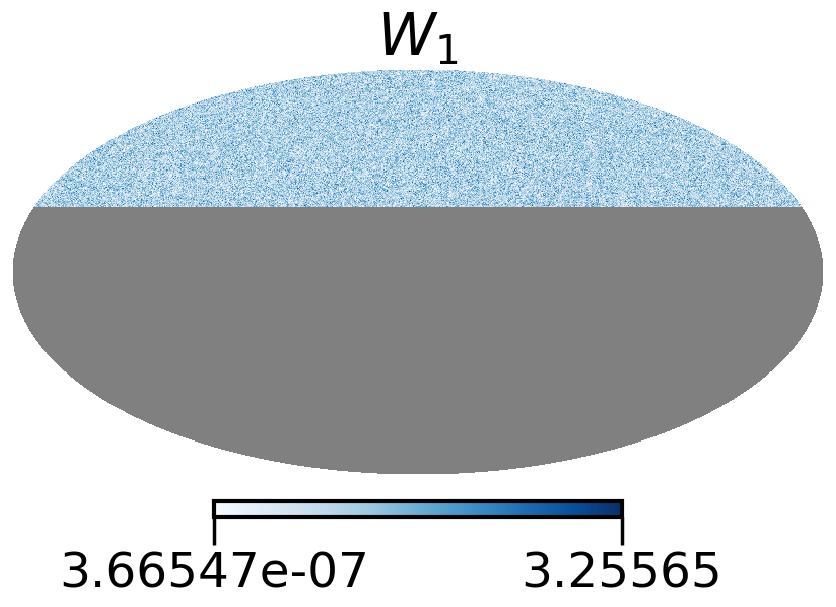

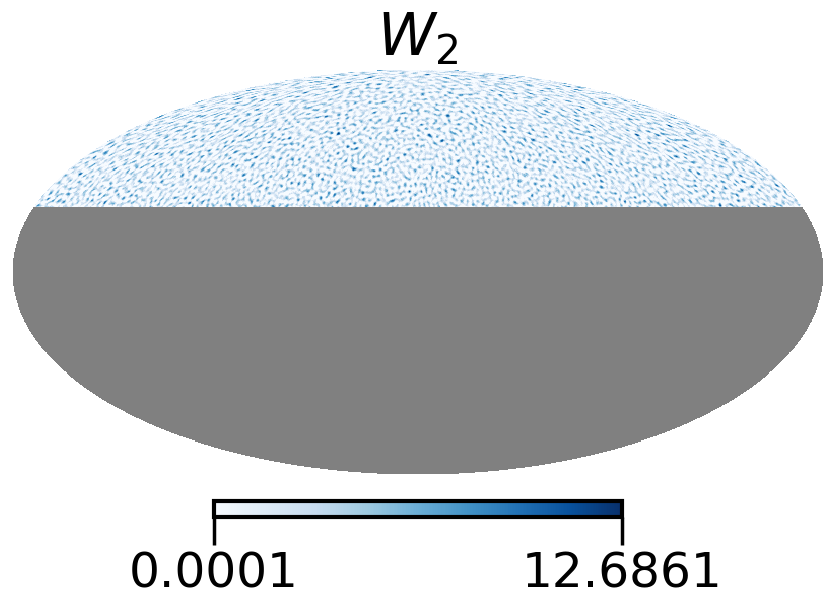

In [14]:
a=hp.mollview(zs_bin[0][0]['window'],title=r'$W_1$',cmap='Blues',return_projected_map=True)
hp.mollview(zs_bin[1][0]['window'],title=r'$W_2$',cmap='Blues')


In [15]:
cl_simi['cl0']

(array([1.95807365e-06, 5.54217815e-06, 8.80962809e-06, ...,
        5.10743009e-07, 5.10201459e-07, 5.09661486e-07]),
 array([0.00000000e+00, 0.00000000e+00, 2.16351437e-08, ...,
        4.65262925e-10, 4.64715747e-10, 4.64170710e-10]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 0.00000000e+00, 7.48839301e-08, ...,
        5.63736594e-09, 5.63136095e-09, 5.62538735e-09]))

In [16]:
clt=cl_simi['cl0'][0]
cmap=hp.synfast(clt,nside=1024)

/hildafs/home/sukhdeep/.local/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/sphtfunc.py:396: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


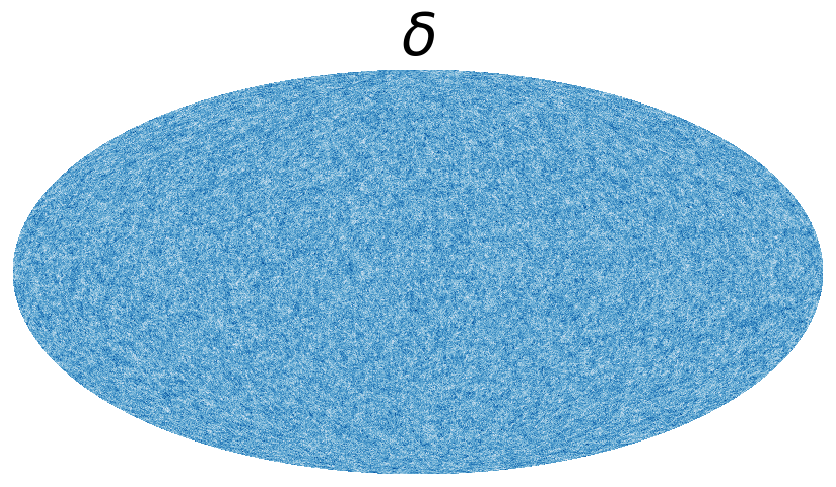

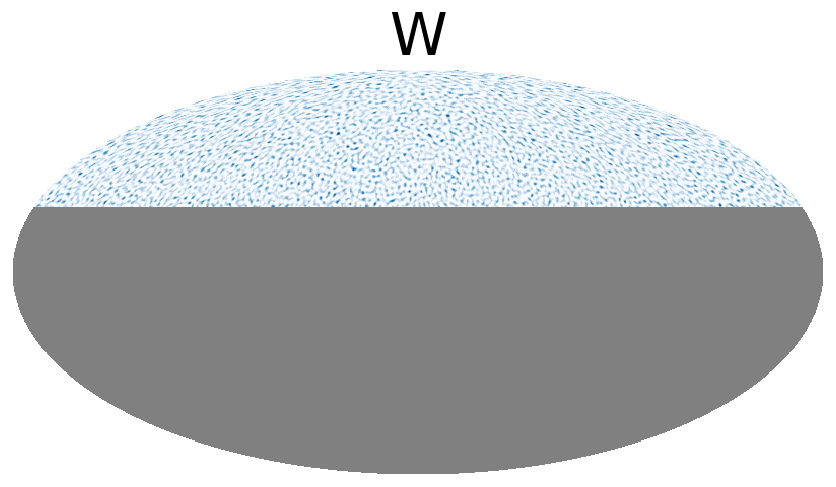

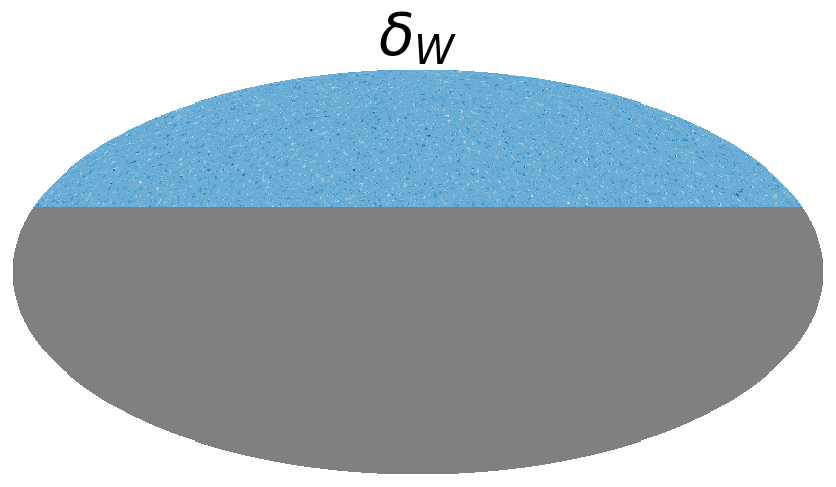

In [17]:
hp.mollview(cmap,cmap='Blues',title='$\delta$',cbar=False)
hp.mollview(zs_bin[1][0]['window'],cmap='Blues',cbar=False,title='W')
cmap2=cmap*zs_bin[1][0]['window']
mm=zs_bin[1][0]['window']==hp.UNSEEN
cmap2[mm]=hp.UNSEEN
hp.mollview(cmap2,cmap='Blues',cbar=False,title='$\delta_W$')

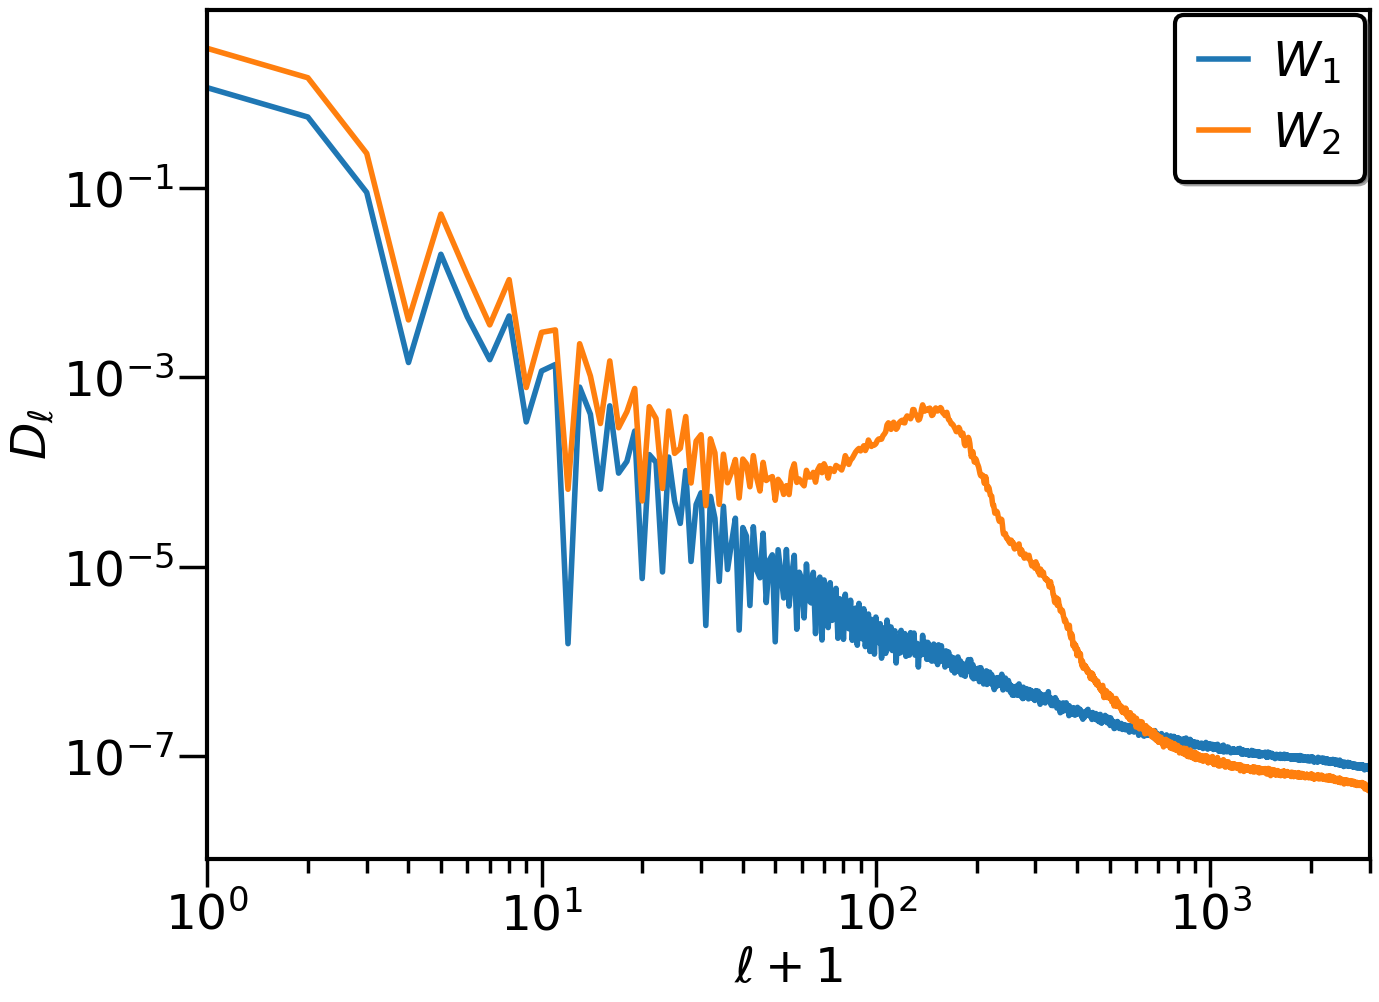

In [18]:
wl1=hp.anafast(zs_bin[0][0]['window'])
wl2=hp.anafast(zs_bin[1][0]['window'])
lt=np.arange(len(wl1))
plot(1+lt,wl1,label=r'$W_1$')
plot(1+lt,wl2,label=r'$W_2$')
loglog()
legend()
xlabel(r'$\ell+1$')
ylabel(r'$D_\ell$')
xlim(1,3000)
fname='window_power_spectra'
fname=fig_home+fname
fname+='.pdf'
savefig(fname,bbox_inches='tight',format='pdf')


In [19]:
cl_simi['cl_b_stats']['iMaster']['cov'].shape

(100, 100)

In [20]:
cl_simi['cl_b_stats']['iMaster'].keys()

dict_keys(['std', 'mean', 'median', 'percentile', 'cov', 'percentile_score'])

In [21]:
corr_i=1
dd=cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i]

In [22]:
dd2=cl_simi['cl_b_stats']['iMaster']['mean'][corr_i*nlb:corr_i*nlb+nlb]
ee=cl_simi['cl_b_stats']['iMaster']['std'][corr_i*nlb:corr_i*nlb+nlb]
cc=cl_simi['cl_b_stats']['iMaster']['cov'][corr_i*nlb:corr_i*nlb+nlb,corr_i*nlb:corr_i*nlb+nlb]

In [23]:
np.diag(cc)/ee**2

array([1.00100149, 1.00100108, 1.00100023, 1.00100106, 1.00100083,
       1.00100111, 1.00100141, 1.00100125, 1.00100192, 1.0010011 ,
       1.00100082, 1.00100097, 1.00100063, 1.00100109, 1.00100143,
       1.00100048, 1.0010007 , 1.00100091, 1.00100084, 1.00100067,
       1.0010009 , 1.00100075, 1.00100141, 1.00100031, 1.00099983])

In [24]:
lb[5:-1]

array([ 30.5,  36. ,  42.5,  50. ,  58.5,  68.5,  80.5,  95. , 112.5,
       133.5, 158.5, 188.5, 224.5, 267.5, 319. , 381. , 456. , 546. ,
       653.5])

('shear', 'shear') 1
('shear', 'shear') [1.0178704  1.00520982 1.00003756 1.0000021  0.99934203 1.00116988
 0.99557235 1.00184876 0.99673552 1.0011229  0.99883317 1.00656898
 1.00346416 1.00389112 0.99919023 1.00213187 1.00019806 0.99896986
 1.00210482 0.99831991 0.99919633 0.99909583 1.00135559 1.0008106
 1.00052714 0.99989262 1.00030973 0.99971173 1.00001492 1.00054474
 1.00034021 1.00072829 0.99994809 1.00057951 1.00044724 1.00031548
 1.00391867]
chi2 36
0 ('shear', 'shear') Master  35.1413343444992
chi2 36
0 ('shear', 'shear') iMaster  0.05865667973699266
chi2 36
0 ('shear', 'shear') nMaster  562.1171371129176
('shear', 'shear') [1.11012849 0.99734241 1.01696626 1.02229913 1.00135152 1.00305183
 0.99590833 1.00136365 1.00413882 0.99937572 0.99456435 1.00112691
 0.99894094 1.00622847 1.01140995 1.01298323 1.00736768 1.0014194
 0.99696466 0.99882421 0.99931422 1.00067697 1.0000076  0.99653448
 1.01146101]
chi2 24
1 ('shear', 'shear') Master  590.52255968533
chi2 24
1 ('shear', 'shear

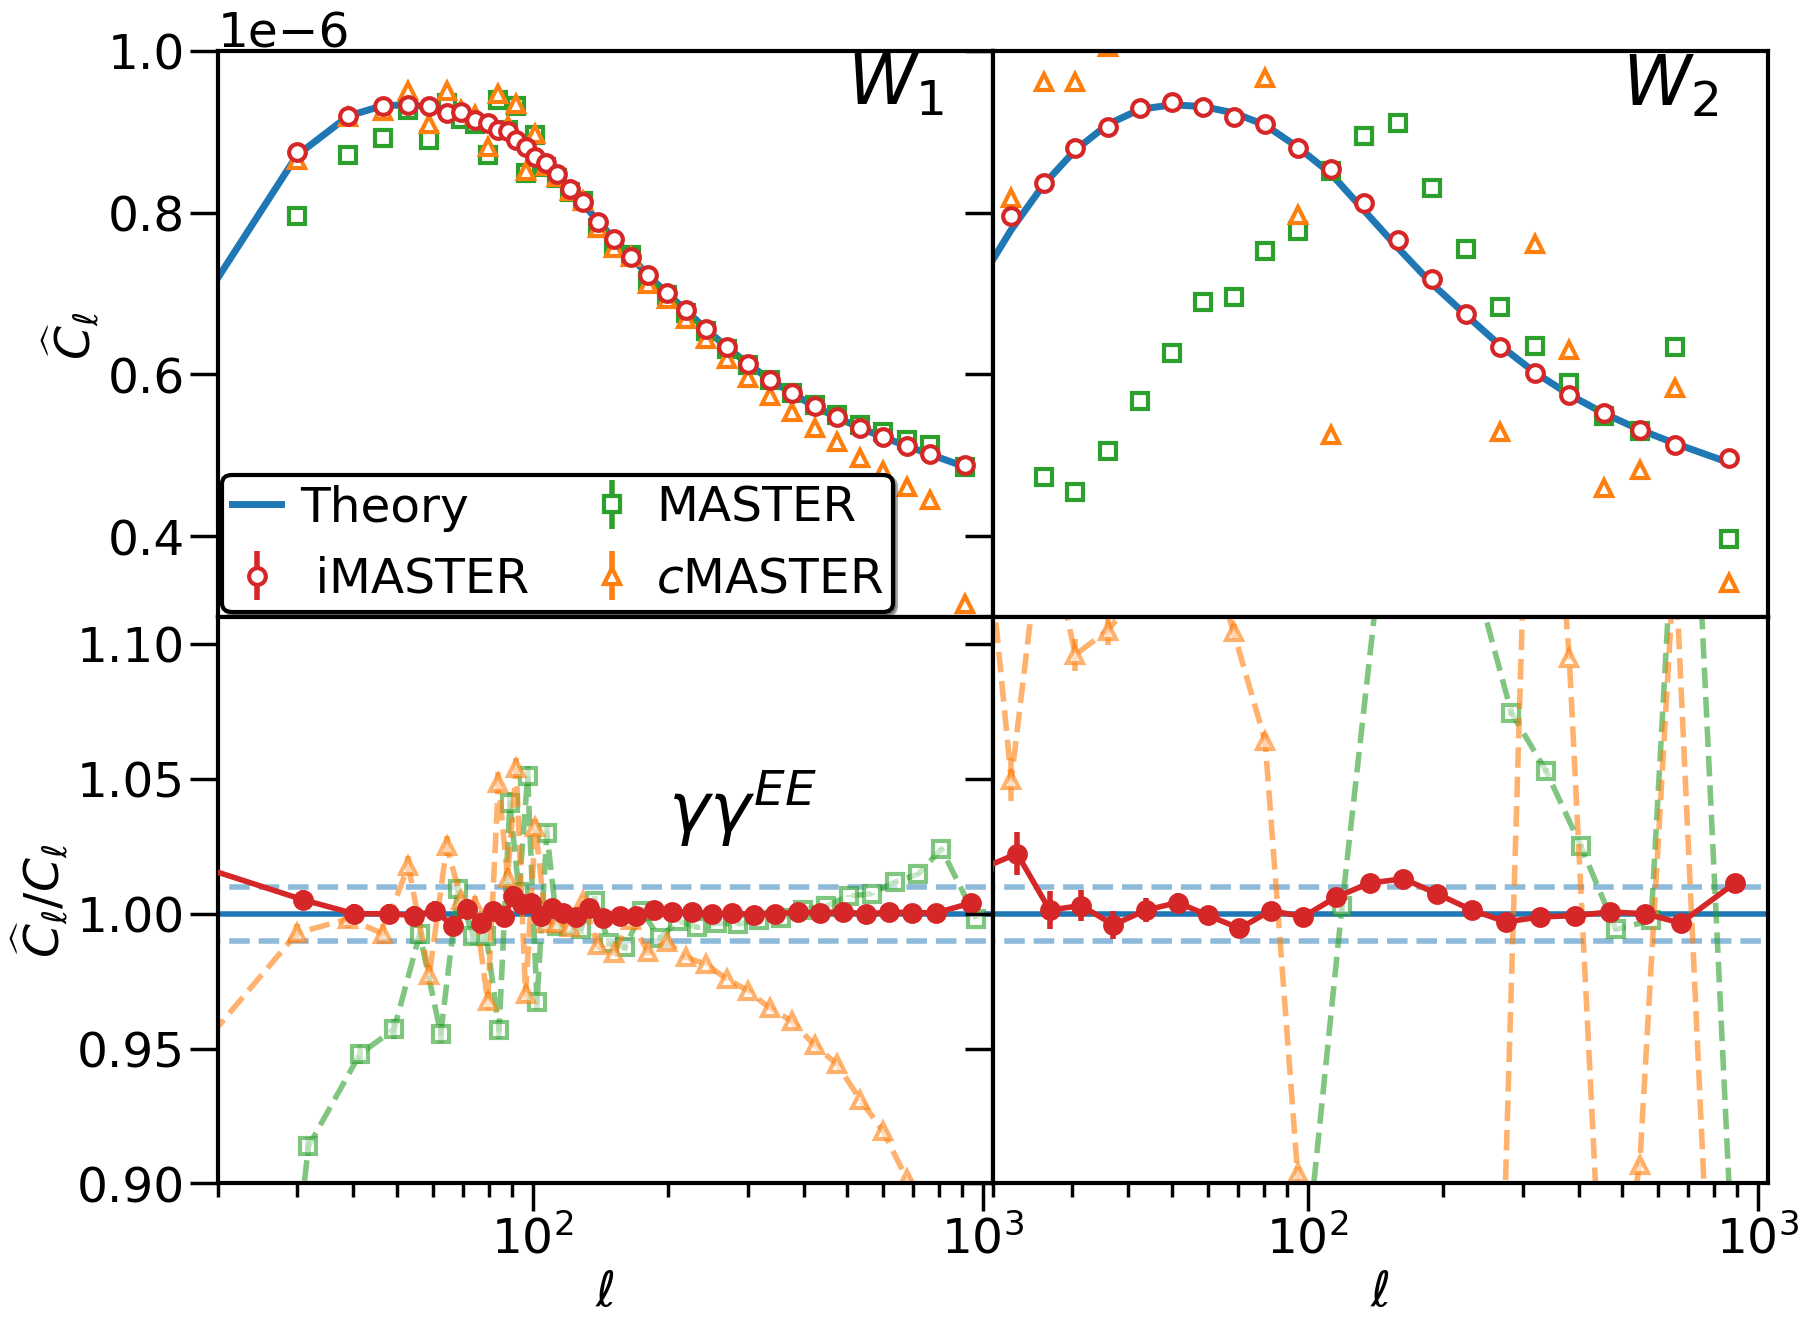

('galaxy', 'shear') 2
('galaxy', 'shear') [1.02049706 0.99982423 1.00061194 0.99927147 0.99638224 1.00524805
 0.98933451 1.00716619 0.99647717 0.99624642 1.00207777 1.0009958
 1.00334452 0.9998703  0.99918115 1.00458338 1.00150858 0.9934713
 1.00352476 0.99517383 0.99920141 0.99603959 1.00036874 1.00135489
 1.00069455 0.99776321 0.9996208  0.99980842 0.99841149 1.00028938
 1.00001173 1.0003448  0.99968761 1.00018611 1.00078819 0.9989434
 1.00337928]
chi2 36
0 ('galaxy', 'shear') Master  0.4104307957020593
chi2 36
0 ('galaxy', 'shear') iMaster  0.03107593475917808
chi2 36
0 ('galaxy', 'shear') nMaster  0.47030790563990643
('galaxy', 'shear') [1.0612695  0.98950339 1.00346567 0.99526845 0.99200917 0.99443278
 0.98192685 0.99624751 0.99665617 0.99499374 1.0026323  0.99040562
 1.000507   0.99464004 0.99989219 0.99902664 0.99775806 1.00020096
 0.99514879 1.00071856 1.00169611 1.000018   1.00079952 0.99984421
 1.00114229]
chi2 24
1 ('galaxy', 'shear') Master  0.07745294460076187
chi2 24
1 ('

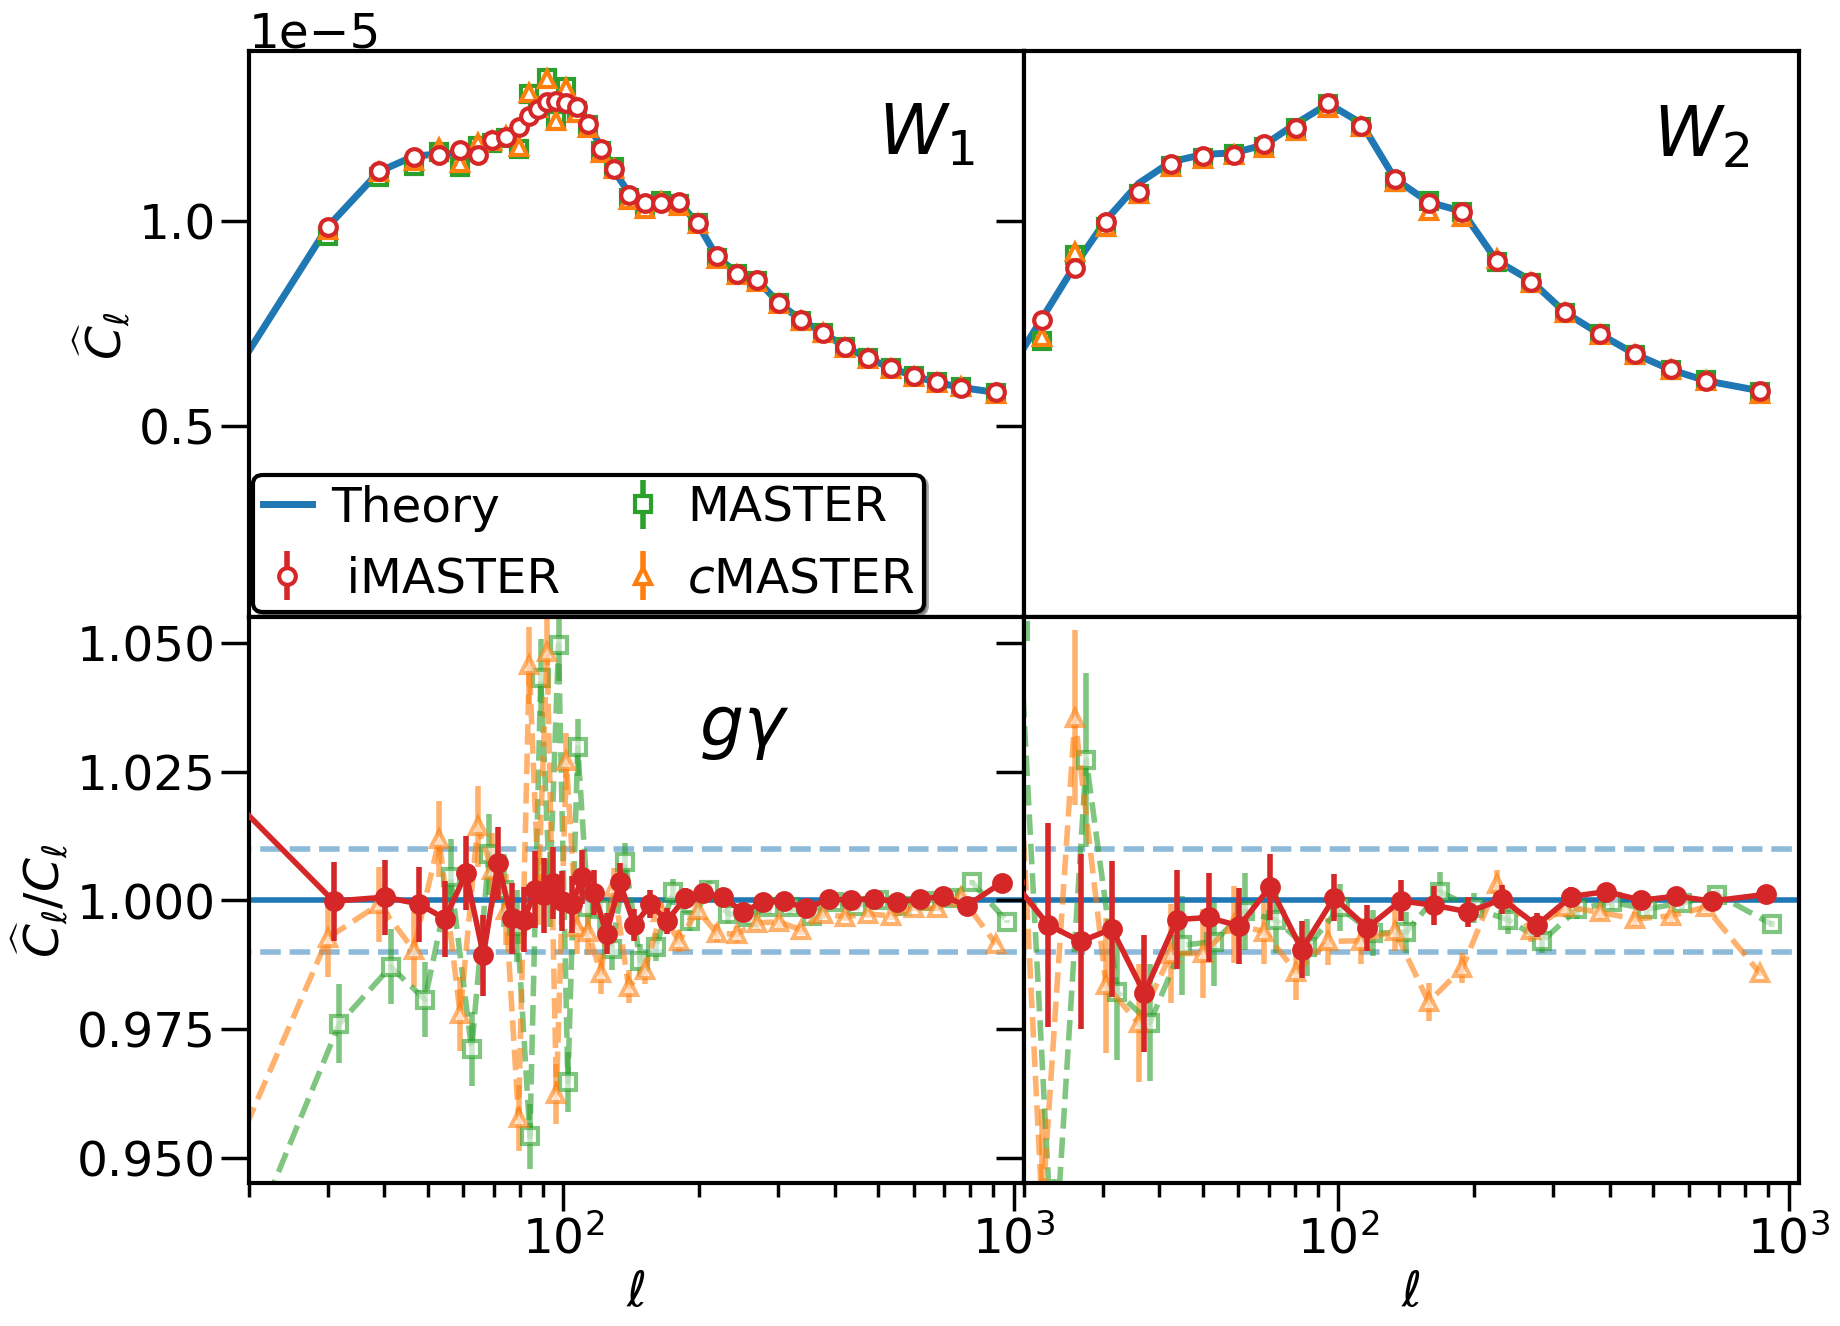

('galaxy', 'galaxy') 3
('galaxy', 'galaxy') [1.01705223 1.00588549 0.99988576 0.99871703 0.99281313 1.00515131
 0.99637073 1.00049495 0.99615398 1.00246401 0.99976559 1.00326738
 0.99966566 1.00235032 0.9973898  1.00249099 0.99941879 0.99876873
 0.99670686 1.0003081  0.99866115 0.99981579 0.99981326 0.99996095
 1.00049141 0.99890173 1.00028784 1.00051216 0.9996089  1.00031876
 0.99981896 1.00057236 1.00003142 1.0008938  1.00098649 1.00101086
 1.00499673]
chi2 36
0 ('galaxy', 'galaxy') Master  453.2659183773296
chi2 36
0 ('galaxy', 'galaxy') iMaster  0.07905355093626798
chi2 36
0 ('galaxy', 'galaxy') nMaster  6143.057468806934
('galaxy', 'galaxy') [1.10755196 0.99340775 0.97854477 0.99748011 1.00328033 0.99086857
 0.9975616  0.9997917  1.00033236 1.00030668 1.00016418 0.9988534
 1.00373967 1.0038793  1.0068671  1.00754193 1.00248701 1.00030589
 0.9951143  0.99863469 1.00197199 0.99967192 1.0001696  0.99613935
 1.01241288]
chi2 24
1 ('galaxy', 'galaxy') Master  1781.8616118137227
chi2 24

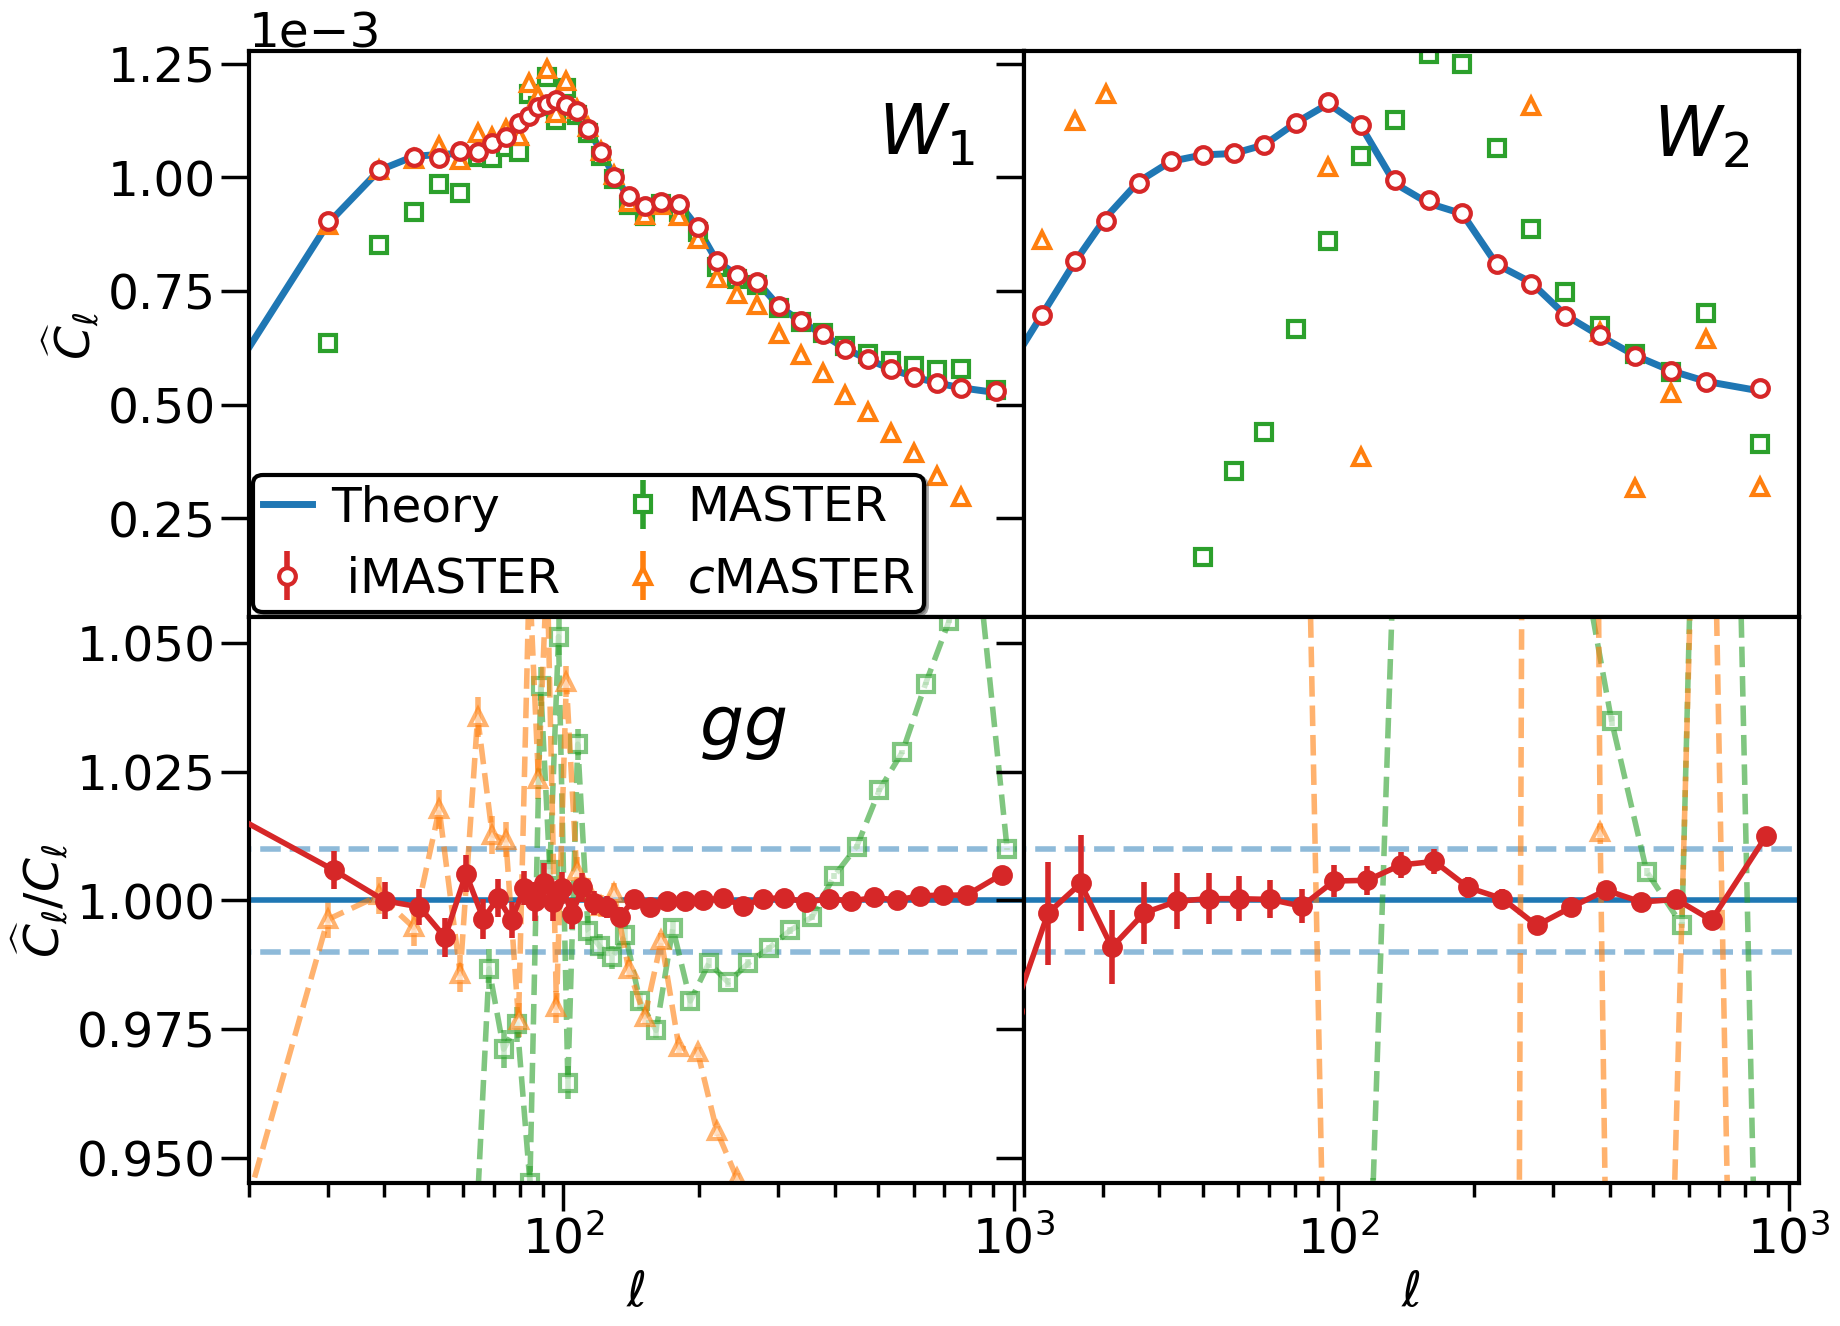

In [27]:
f=1
corr_i=0
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    if corr_i==0:
        corr_i+=1
        continue
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        cl0i=cl_simi['cl0_b'][corr]#[nlb*corr_i:nlb*corr_i+nlb]
#         cl0i=cl_simi['cl0_b'][nlb*corr_i:nlb*corr_i+nlb]
        
        pS.plot(lb,f*cl0i,c=colors[0],label='Theory',lw=5)
        print(corr,cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i]/cl0i)
        pS.errorbar(lb,f*cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['iMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='o',c=colors[3],mfc='white',mew=3,label=r' iMASTER',zorder=10)    
        pS.errorbar(lb*1.0,f*cl_simi['cl_b_stats']['Master']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['Master']['std'].reshape(4,nlb)[corr_i],
                    fmt='s',c=colors[2],mfc='white',mew=3,label=r'MASTER')
        pS.errorbar(lb,f*cl_simi['cl_b_stats']['nMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['nMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='^',c=colors[1],mfc='white',mew=3,label=r'$\it c$MASTER')

        for M in['Master','iMaster','nMaster']:
            cov_i=cl_simi['cl_b_stats'][M]['cov'][corr_i*nlb:corr_i*nlb+nlb,corr_i*nlb:corr_i*nlb+nlb]*1.
            d_i=cl_simi['cl_b_stats'][M]['mean'].reshape(4,nlb)[corr_i]*1.
#             chi_i=chi2(data=d_i, model=cl0i,cov=cov_i)
            idx_min=0
            chi_i=chi2(data=d_i[idx_min:-1], model=cl0i[idx_min:-1],cov=cov_i[idx_min:-1,idx_min:-1])
            print(simj,corr,M,'',chi_i) #,chi_i/nlb)

        f=1./cl0i
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.03,f*cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['iMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='o-',c=colors[3],mfc=None,mew=3,label=r'$\it i$ MASTER',zorder=10)
        pR.errorbar(lb*1.06,f*cl_simi['cl_b_stats']['Master']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['Master']['std'].reshape(4,nlb)[corr_i],
                    fmt='s--',c=colors[2],mfc='white',mew=3,label=r'MASTER',alpha=0.6)
        pR.errorbar(lb,f*cl_simi['cl_b_stats']['nMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['nMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='^--',c=colors[1],mfc='white',mew=3,label=r'$\it c$MASTER',alpha=0.6)

        # plot(lb,f*(coupling_M_binned_inv@cl_sim_W['clp_b'][0,:]))
        # plot(l,cl_sim_N['clg_stats']['mean'],'g--')
        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.945,1.055)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_ylim((lb*cl0i).min()*.1,(lb*cl0i).max()*1.1)
        tf=.9
        if corr==corr_ll:
            pS.set_ylim(3.e-7,1.e-6)
            pR.set_ylim(.9,1.11)
            tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat C_\ell/C_\ell$')
            pS.set_ylabel(r'$\widehat C_\ell$ ')#+corr_labels[corr])
        pS.text(x=500,y=(lb*cl0i).max()*tf,s=r'$W_'+str(simj+1)+'$',fontsize=50)
#     if corr==corr_ggl:
    ax[0,0].legend(ncol=2,borderpad=0.2,handletextpad=.4,columnspacing=1.2)
    ax[1,0].text(x=200,y=1.03,s=corr_labels[corr],fontsize=50)
    
    fname=fnames[0].split('.pkl')[0]
    fname=fname.split('tests')[1]
    fname=fname.split('.')
    fname=fname[0]+fname[1]

#     fname=fig_home+fname
#     fname+='_'+corr_fnames[corr]+'.pdf'
#     fig.savefig(fname,bbox_inches='tight',format='pdf')
#     print('saved to ',fname)
    show()
    corr_i+=1

In [26]:
nlb

25